In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
#charger les données
#https://www.kaggle.com/sidtwr/videogames-sales-dataset
dataset = 'PS4_GamesSales.csv'
df = pd.read_csv(dataset, encoding = 'latin-1')
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [171]:
df.shape

(1034, 9)

In [172]:
df.dtypes

Game              object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
dtype: object

In [173]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0


On constate qu'il y a des jeux sans année et sans éditeur, on supprime donc les jeux du dataset où ces valeurs manquent

In [174]:
df.isna().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [201]:
df = df.dropna()

In [203]:
df.shape

(825, 9)

In [204]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1025,Biomutant,2019-01-01,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1026,de Blob,2017-01-01,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1027,Chaos on Deponia,2017-01-01,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0
1028,Code Vein,2018-01-01,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017-01-01,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0


On convertit la date en datetime

In [209]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [211]:
df.dtypes

Game                     object
Year             datetime64[ns]
Genre                    object
Publisher                object
North America           float64
Europe                  float64
Japan                   float64
Rest of World           float64
Global                  float64
dtype: object

In [202]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014-01-01,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015-01-01,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018-01-01,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017-01-01,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017-01-01,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [179]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1029,Fallen Legion: Flames of Rebellion,NaT,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017-01-01,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaT,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaT,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaT,Action,NaN,0.0,0.0,0.0,0.0,0.0


On met au point notre premier diagramme
Dans ce diagramme on cherche à voir les nombres de ventes atteint par les jeux

In [212]:
serie = df['Global']
n = serie.count()
n_bins = np.sqrt(n).astype(int)

(array([645.,  70.,  33.,  17.,  17.,  12.,   8.,   2.,   4.,   3.,   2.,
          2.,   3.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.    ,  0.6925,  1.385 ,  2.0775,  2.77  ,  3.4625,  4.155 ,
         4.8475,  5.54  ,  6.2325,  6.925 ,  7.6175,  8.31  ,  9.0025,
         9.695 , 10.3875, 11.08  , 11.7725, 12.465 , 13.1575, 13.85  ,
        14.5425, 15.235 , 15.9275, 16.62  , 17.3125, 18.005 , 18.6975,
        19.39  ]),
 <BarContainer object of 28 artists>)

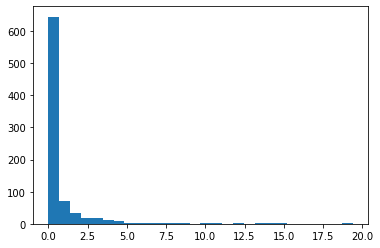

In [213]:
plt.hist(serie,
        bins=n_bins)

On constate que la majorité des jeux ont des ventes faibles aux alentours de 0, on va essayer de modifier l'échelle pour en voir plus

In [226]:
bins = np.arange(0., 25., 5)
bins.shape

(5,)

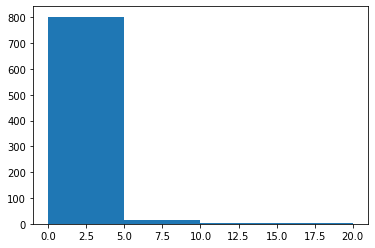

In [227]:
plt.hist(serie,
        bins=bins);

On va chercher à grouper les ventes global par éditeur

In [242]:
df['Ventes_éditeur'] = df.groupby(['Publisher'])['Global'].sum().reset_index(drop=False).sort_values('Global')

ValueError: Wrong number of items passed 2, placement implies 1

In [243]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,ventes_éditeur
0,Grand Theft Auto V,2014-01-01,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,NaN
1,Call of Duty: Black Ops 3,2015-01-01,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,NaN
2,Red Dead Redemption 2,2018-01-01,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,NaN
3,Call of Duty: WWII,2017-01-01,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,NaN
4,FIFA 18,2017-01-01,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,NaN


In [235]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,ventes_éditeur
1025,Biomutant,2019-01-01,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0,NaN
1026,de Blob,2017-01-01,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0,NaN
1027,Chaos on Deponia,2017-01-01,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0,NaN
1028,Code Vein,2018-01-01,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0,NaN
1030,Radial G Racing Revolved,2017-01-01,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0,NaN
